In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [303]:
df=pd.read_csv('datasets/train.csv',index_col=False)

In [304]:
df.columns,df.shape

(Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
        's53', 's54', 's55', 's56', 's57', 's58', 's59', 's69', 's70', 's71',
        'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
        'n12', 'n13', 'n14', 'n15', 'label'],
       dtype='object'),
 (28322, 36))

In [305]:
df.isnull().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [306]:
percentage=20
min_count=int(((100-percentage)/100)*df.shape[0]+1)

df=df.dropna(axis=1,thresh=min_count)

<AxesSubplot:>

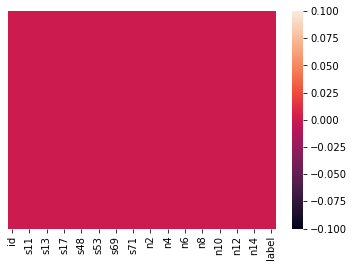

In [307]:
sns.heatmap(df.isnull(),yticklabels=False)

In [308]:
df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [309]:
df=df.drop(['id'], axis = 1)

In [310]:
df[['s52','s53','s71','s70']]

,s52,s53,s71,s70
0,1,,b,op: D
1,1,,b,op: D
2,1,,b,op: D
3,1,,b,op: D
4,l,,d,op: D
...,...,...,...,...
28317,1,,b,op: D
28318,1,,b,op: D
28319,1,,b,op: D
28320,1,,b,op: C


### Feature Selection function

In [311]:
def feature_preprocessor(df):
    percentage=20
    min_count=int(((100-percentage)/100)*df.shape[0]+1)
    df=df.dropna(axis=1,thresh=min_count)
    df['s71']=df['s71'].str.upper()
    df['s70']=df['s70'].str.split(':',expand=True)[1]
    df['s52']=df['s52'].apply(lambda x: x.replace('l','1').replace('o','0'))
    df['s53']=df['s53'].apply(lambda x: x.replace(' ','0').replace('00','1'))
    new_col={'x':'A','~1':'B','C`':'C','0':'D'}
    df.replace({'s69':new_col},inplace=True)

In [312]:
df['s71']=df['s71'].str.upper()
df['s70']=df['s70'].str.split(':',expand=True)[1]

In [313]:
df['s71'].value_counts()

B    25010
D     1612
C     1607
A       93
Name: s71, dtype: int64

In [314]:
df['s70'].value_counts()

 D    24013
 B     2175
 C     1985
 A      149
Name: s70, dtype: int64

In [315]:
df['s52']=df['s52'].apply(lambda x: x.replace('l','1').replace('o','0'))

In [316]:
df['s52'].value_counts()

1    27032
0     1290
Name: s52, dtype: int64

In [317]:
df['s53']

0          
1          
2          
3          
4          
         ..
28317      
28318      
28319      
28320      
28321      
Name: s53, Length: 28322, dtype: object

In [318]:
df['s53']=df['s53'].apply(lambda x: x.replace(' ','0').replace('00','1'))
df['s53'].unique()

array(['1', '0'], dtype=object)

In [319]:
df['s53'].value_counts()
# df['s53'].unique()

1    25752
0     2570
Name: s53, dtype: int64

In [320]:
df['s69'].value_counts()


x     21028
~1     6446
C`      540
0       308
Name: s69, dtype: int64

In [321]:
new_col={'x':'A','~1':'B','C`':'C','0':'D'}
df.replace({'s69':new_col},inplace=True)

In [322]:
df['s69'].value_counts()

A    21028
B     6446
C      540
D      308
Name: s69, dtype: int64

In [323]:
df[['s52','s53','s71','s70']]

,s52,s53,s71,s70
0,1,1,B,D
1,1,1,B,D
2,1,1,B,D
3,1,1,B,D
4,1,1,D,D
...,...,...,...,...
28317,1,1,B,D
28318,1,1,B,D
28319,1,1,B,D
28320,1,1,B,C


In [324]:
df.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,M,Y,N,1,D,D,B,0,1,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,M,Y,Y,1,D,D,B,1,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,M,Y,Y,1,D,D,B,0,1,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,F,Y,Y,1,D,D,B,0,1,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,M,N,Y,1,B,D,D,1,1,1,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [325]:
df.to_csv('new_train.csv',header=True,index=False)

In [326]:
df=pd.read_csv('new_train.csv',index_col=False)

In [327]:
df.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,M,Y,N,1,D,D,B,0,1,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,M,Y,Y,1,D,D,B,1,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,M,Y,Y,1,D,D,B,0,1,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,F,Y,Y,1,D,D,B,0,1,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,M,N,Y,1,B,D,D,1,1,1,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [328]:
df.columns

Index(['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 's53',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [329]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [330]:
X.shape

(28322, 29)

In [331]:
X.columns

Index(['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 's53',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15'],
      dtype='object')

In [332]:
y.unique()

array([0, 1], dtype=int64)

In [333]:
for col in X:
    print(col,' : ',X[col].unique())

gender  :  ['M' 'F']
s11  :  ['Y' 'N']
s12  :  ['N' 'Y']
s13  :  [1 0]
s16  :  ['D' 'B' 'C' 'A']
s17  :  ['D' 'C' 'B' 'A']
s18  :  ['B' 'D' 'C' 'A']
s48  :  [0 1]
s52  :  [1 0]
s53  :  [1 0]
s58  :  ['B' 'A']
s69  :  ['A' 'B' 'C' 'D']
s70  :  [' D' ' C' ' B' ' A']
s71  :  ['B' 'D' 'C' 'A']
n1  :  [16.14466597  7.14455819  6.92323603 ... 13.42979701 16.09462206
  7.05810713]
n2  :  [1.98944148 0.8448659  1.04201802 ... 1.80056198 2.43828046 1.02317194]
n3  :  [2 3 6 9 7 8 4 0 5 1]
n4  :  [2.31838468 6.19776785 7.82440091 ... 7.76338648 6.94276637 5.94202455]
n5  :  [-32.83927744 -32.5765972  -32.51054438 ... -32.57597474 -32.57756295
 -32.84889674]
n6  :  [0.01717551 0.01385715 0.01394339 ... 0.01778231 0.00732437 0.01592836]
n7  :  [-9.12605619 -9.09828731 -9.2348943  ... -9.23372167 -8.74894117
 -9.28094998]
n8  :  [1.73229112 1.50588495 1.50382812 ... 1.45591114 2.07439439 1.49047818]
n9  :  [ 3.69850365  6.79135689  4.10968506 ...  2.90024887 10.67325854
  3.56959828]
n10  :  [ 4.80

In [334]:
for col in df.columns:
    print(df[col].dtype)

object
object
object
int64
object
object
object
int64
int64
int64
object
object
object
object
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
int64
int64


In [335]:
numerical_data=df.select_dtypes(include='float').columns

In [336]:
numerical_data

Index(['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14'], dtype='object')

In [337]:
from sklearn.preprocessing import MinMaxScaler
numerical_data=df.select_dtypes(include='float').columns
for num in numerical_data:
    print(num)
    df[num]=(df[num]-df[num].min())/(df[num].max()-df[num].min())
    print(df[num].head())

n1
0    0.746383
1    0.264630
2    0.252783
3    0.189975
4    0.672906
Name: n1, dtype: float64
n2
0    0.593754
1    0.188681
2    0.258455
3    0.166234
4    0.331420
Name: n2, dtype: float64
n4
0    0.089642
1    0.652340
2    0.888281
3    0.950995
4    0.086977
Name: n4, dtype: float64
n5
0    0.373757
1    0.672798
2    0.747994
3    0.875344
4    0.877545
Name: n5, dtype: float64
n6
0    0.564172
1    0.451332
2    0.454265
3    0.333325
4    0.534031
Name: n6, dtype: float64
n7
0    0.420795
1    0.450609
2    0.303941
3    0.150269
4    0.274880
Name: n7, dtype: float64
n8
0    0.556536
1    0.329020
2    0.326953
3    0.308900
4    0.442900
Name: n8, dtype: float64
n9
0    0.136646
1    0.491901
2    0.183876
3    0.546406
4    0.141143
Name: n9, dtype: float64
n10
0    0.334484
1    0.454781
2    0.256065
3    0.311906
4    0.265165
Name: n10, dtype: float64
n11
0    0.111199
1    0.530885
2    0.760657
3    0.094102
4    0.344572
Name: n11, dtype: float64
n14
0    0.63119

In [338]:
df.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,M,Y,N,1,D,D,B,0,1,1,...,0.420795,0.556536,0.136646,0.334484,0.111199,0,0,0.631190,5,0
1,M,Y,Y,1,D,D,B,1,1,1,...,0.450609,0.329020,0.491901,0.454781,0.530885,0,0,0.392689,3,1
2,M,Y,Y,1,D,D,B,0,1,1,...,0.303941,0.326953,0.183876,0.256065,0.760657,0,0,0.222461,2,0
3,F,Y,Y,1,D,D,B,0,1,1,...,0.150269,0.308900,0.546406,0.311906,0.094102,0,0,0.154326,4,0
4,M,N,Y,1,B,D,D,1,1,1,...,0.274880,0.442900,0.141143,0.265165,0.344572,0,1,0.737541,1,0


In [339]:
categorical_data=df.select_dtypes(include='object').columns

In [340]:
categorical_data

Index(['gender', 's11', 's12', 's16', 's17', 's18', 's58', 's69', 's70',
       's71'],
      dtype='object')

In [341]:
from sklearn.preprocessing import LabelEncoder

# gender,s11,s12,s16-s18,s58-s71
for cat in categorical_data:
    print(cat)
le=LabelEncoder()
for cat in categorical_data:
    df[cat]=le.fit_transform(df[cat])
    

gender
s11
s12
s16
s17
s18
s58
s69
s70
s71


In [346]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [351]:
X.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,0,1,3,3,1,0,1,1,...,0.564172,0.420795,0.556536,0.136646,0.334484,0.111199,0,0,0.631190,5
1,1,1,1,1,3,3,1,1,1,1,...,0.451332,0.450609,0.329020,0.491901,0.454781,0.530885,0,0,0.392689,3
2,1,1,1,1,3,3,1,0,1,1,...,0.454265,0.303941,0.326953,0.183876,0.256065,0.760657,0,0,0.222461,2
3,0,1,1,1,3,3,1,0,1,1,...,0.333325,0.150269,0.308900,0.546406,0.311906,0.094102,0,0,0.154326,4
4,1,0,1,1,1,3,3,1,1,1,...,0.534031,0.274880,0.442900,0.141143,0.265165,0.344572,0,1,0.737541,1


In [348]:
y.value_counts()

0    23562
1     4760
Name: label, dtype: int64

In [352]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [289]:
df_train=pd.concat([X_train,y_train],axis=1)

In [290]:
df_train.columns


Index(['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 's53',
       's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

### Upscaled minority training set 

In [362]:
df_train_majority = df_train[df_train.label==0]
df_train_minority = df_train[df.label==1]


<ipython-input-362-f0c15e22fce4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_minority = df_train[df.label==1]


In [363]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_train_minority,replace=True,n_samples=len(df_train_minority),random_state=42)

df_upscaled=pd.concat([df_train_majority,df_minority_upsampled])


In [236]:
df_upscaled.label.value_counts()

0    18839
1     3818
Name: label, dtype: int64

In [237]:
X=df_upscaled.iloc[:,:-1]
y=df_upscaled.iloc[:,-1]

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Downsampled majority training set 

In [291]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_train_majority,replace=False,n_samples=len(df_train_majority),random_state=42)

df_downsampled=pd.concat([df_train_minority,df_majority_downsampled])


In [292]:
df_downsampled.label.value_counts()

0    18839
1     3818
Name: label, dtype: int64

In [293]:
X=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [365]:

from sklearn.utils import resample
df_train=pd.concat([X_train,y_train],axis=1)
df_train_majority = df_train[df_train.label==0]
df_train_minority = df_train[df.label==1]
r=False
df1=resample()
df_majority_downsampled=resample(df_train_majority,replace=r,n_samples=len(df_train_majority),random_state=42)
df_downsampled=pd.concat([df_train_minority,df_majority_downsampled])

True
False


<ipython-input-365-644a3ed22722>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_minority = df_train[df.label==1]


### Random Over Sampler

In [176]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

sampler=RandomOverSampler(sampling_strategy='minority')
X_train_rs,y_train_rs=sampler.fit_resample(X_train,y_train)
print("The total number of classes before sampling: {}".format(Counter(y_train)))
print("The total number of classes after sampling: {}".format(Counter(y_train_rs)))

The total number of classes before sampling: Counter({0: 18839, 1: 3818})
The total number of classes after sampling: Counter({0: 18839, 1: 18839})


In [178]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=4, min_child_weight=4,eval_metric='mlogloss',learning_rate=0.01)

In [179]:
model.fit(X_train_rs,y_train_rs)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [180]:
model.score(X_train_rs,y_train_rs)

0.7869844471574924

In [182]:
y_predict=model.predict(X_test)

In [187]:
y_test.value_counts()

0    4723
1     942
Name: label, dtype: int64

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      4723
           1       0.45      0.72      0.55       942

    accuracy                           0.81      5665
   macro avg       0.69      0.77      0.71      5665
weighted avg       0.85      0.81      0.82      5665



### SMOTE

In [353]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sampler=SMOTE()
X_train_rs,y_train_rs=sampler.fit_resample(X_train,y_train)
print("The total number of classes before sampling: {}".format(Counter(y_train)))
print("The total number of classes after sampling: {}".format(Counter(y_train_rs)))

The total number of classes before sampling: Counter({0: 18839, 1: 3818})
The total number of classes after sampling: Counter({0: 18839, 1: 18839})


In [354]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=4, min_child_weight=4,eval_metric='mlogloss',learning_rate=0.01)

In [355]:
model.fit(X_train_rs,y_train_rs)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [356]:
model.score(X_train_rs,y_train_rs)

0.7985561866341101

In [357]:
y_predict=model.predict(X_test)

In [358]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4723
           1       0.47      0.66      0.55       942

    accuracy                           0.82      5665
   macro avg       0.70      0.76      0.72      5665
weighted avg       0.85      0.82      0.83      5665



### Finding the better hyperparameter

In [62]:
from sklearn.model_selection import GridSearchCV

cv_params={'max_depth':[1,2,3,4,5,6],'min_child_weight':[1,2,3,4]}
fix_params={'learning_rate':0.01,'n_estimators': 100, 'objective': 'binary:logistic'}

csv=GridSearchCV(XGBClassifier(**fix_params),cv_params,scoring='precision',cv=5)
csv.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]},
             scoring='precision')

In [63]:
csv.best_params_

{'max_depth': 6, 'min_child_weight': 1}

### Creating the XGB classifier model

In [295]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=4, min_child_weight=4,eval_metric='mlogloss',learning_rate=0.01)

In [296]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [297]:
model.score(X_train,y_train)

0.8745379310344827

In [298]:
y_pred=model.predict(X_test)

In [299]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [300]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8722418358340689

In [301]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3749
           1       0.75      0.40      0.52       783

    accuracy                           0.87      4532
   macro avg       0.82      0.68      0.72      4532
weighted avg       0.86      0.87      0.86      4532



In [51]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=5,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [52]:
y_predict=tree.predict(X_test)

In [53]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8653133274492498

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4723
           1       0.68      0.36      0.47       942

    accuracy                           0.87      5665
   macro avg       0.78      0.66      0.70      5665
weighted avg       0.85      0.87      0.85      5665



In [55]:
train_id

NameError: name 'train_id' is not defined

In [ ]:
xgboost_df.head()

### Test Dataset : Feature Engineering and Fitting

In [ ]:
test=pd.read_csv('datasets/test.csv',index_col=False)

In [ ]:
test.head()

In [ ]:
test_id=test['id']
test=test.drop(['id'],axis=1)

In [ ]:
test_id.nunique()

In [ ]:
percentage=20
min_count=int(((100-percentage)/100)*test.shape[0]+1)
test=test.dropna(axis=1,thresh=min_count)
test['s71']=test['s71'].str.upper()
test['s70']=test['s70'].str.split(':',expand=True)[1]
test['s52']=test['s52'].apply(lambda x: x.replace('l','1').replace('o','0'))
test['s53']=test['s53'].apply(lambda x: x.replace(' ','0').replace('00','1'))
new_col={'x':'A','~1':'B','C`':'C','0':'D'}
test.replace({'s69':new_col},inplace=True)

In [ ]:
test.shape

In [ ]:
test.columns

In [ ]:
for x in test:
    print(test[x].value_counts())

In [ ]:
def normalize(df):
    numerical_data=df.select_dtypes(include='float').columns
    for num in numerical_data:
        print(num)
        df[num]=(df[num]-df[num].min())/(df[num].max()-df[num].min())
    return df
    

In [ ]:
def label_encode(df):
    categorical_data=df.select_dtypes(include='object').columns
    le=LabelEncoder()
    for cat in categorical_data:
        df[cat]=le.fit_transform(df[cat])
    return df
    

In [ ]:
test_encoded=label_encode(test)

In [ ]:
test_data=normalize(test_encoded)

In [ ]:
test_data.head()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model=XGBClassifier(eval_metric='rmse',learning_rate=0.01)
model.fit(X_train,y_train)
y_predict=model.predict(test_data)

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train,y_train)

auc(model, X_train, X_test)



In [ ]:
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(X_train,y_train)

auc(model, X_train, X_test)

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_predict

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    


In [ ]:
xgb_df=pd.DataFrame({'id':test_id,'label':y_predict})

In [ ]:
xgb_df.head()

In [ ]:
xgb_df.shape

In [ ]:
xgb_df.to_csv('datasets/results/xgb_df.csv',header=True,index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
y_predict=tree.predict(test_encoded)
y_predict

In [ ]:
tree.score(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    



In [ ]:
d_tree=pd.DataFrame({'id':test_id,'label':y_predict})

In [ ]:
d_tree

In [ ]:
d_tree.to_csv('datasets/results/decision_tree_df.csv',header=True,index=False)